In [59]:
import yaml
import random
import numpy as np
import time

from reader import Reader
from const import Const
from utils import get_F_example
from clustering import Clusters
from i_merge import IMerger
from Subclusterring import Subclusters

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Если есть желание создать свои данные, то вызвать этот код

In [60]:
X, y = make_blobs(n_samples=300, n_features=3, centers=7, cluster_std=0.6, random_state=0)

ids = [i+1 for i in range(len(X))]
df = pd.DataFrame()
df['id'] = ids
df['X1'] = X[:,0]
df['X2'] = X[:,1]
df['X3'] = X[:,2]

In [ ]:
# ids = []
# X1 = []
# X2 = []
# with open('Two.txt', 'r') as f:
#     for k, line in enumerate(f):
#         if k==0:
#             continue
#         ids.append(int(line.split()[0]))
#         X1.append(float(line.split()[1]))
#         X2.append(float(line.split()[2]))
#         if k>=205:
#             break
# df = pd.DataFrame()
# df['id'] = ids
# df['X1'] = X1
# df['X2'] = X2
    

In [44]:
reader = Reader()

In [45]:
df = reader.read('3d.xlsx')

In [46]:
df.head()

,id,X1,X2,X3
0,0,1,56.088098,-177.290805
1,1,1,96.761453,245.446965
2,2,2,139.505922,-183.899594
3,3,2,52.517203,199.355762
4,4,3,100.088408,-182.380026


In [61]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3')
fig.show()

# Подбор констант

In [62]:
# const = Const('./example.yaml')
const = Const()

C:\Users\nekro\Documents\Cluster\clusters\const.py:15: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [63]:
const.norm(df) # Нормировка

In [64]:
const.get_norms() # Получение норм

{'X1': 0.9759239388806902, 'X2': 1.0469231626725906, 'X3': 1.3734022227854426}

In [65]:
a = time.time()
const.calculate_a(df, type_of_optimization=3) # Вычисление а и пересчет констант
b = time.time()
print(b-a)


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:53<00:00,  4.42s/it]

53.368582010269165


In [66]:
const.add_Fcolumn(df)

In [10]:
df.head()

,id,X1,X2,X3,F
0,0,0.060101,4.499107,-3.300159,12.323275
1,1,0.060101,7.761720,4.568843,6.530618
2,2,0.120202,11.190467,-3.423177,9.343060
3,3,0.120202,4.212667,3.710884,6.454896
4,4,0.180303,8.028592,-3.394891,11.768372


In [ ]:
const.config # Вывод параметров

In [ ]:
# const.config['conturs']['min_diff'] = 6.21
const.config['isolated_cluster']['divider'] = 1

In [11]:
# const.save_consts('3d') #Сохранение констант в файл

Writing settings in file 3d .yaml


Researching dataset

In [ ]:
# fig = px.scatter_3d(df, x='X1', y='X2', z='F')
# fig.show()

# Кластеризация

In [76]:
cluster = Clusters(const.config) 

In [77]:
df = cluster.get_isolated_clusters(df) # Вычисление кластеров
df.head()


 23%|██████████████████▎                                                              | 68/300 [00:43<03:08,  1.23it/s]


 45%|████████████████████████████████████▎                                           | 136/300 [01:43<02:43,  1.00it/s]


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [02:39<01:05,  1.46it/s]


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [03:43<00:20,  1.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [04:04<00:00,  1.42it/s]

,id,X1,X2,X3,F,subcluster_id,cluster_id
0,1,0.513361,-2.134845,2.210909,39.536146,2,4
1,2,1.405493,6.820601,-6.892799,28.807026,0,3
2,3,0.886324,-2.496526,1.848823,35.081346,2,4
3,4,6.014676,6.221326,6.617437,35.906229,1,5
4,5,-1.577645,7.454646,6.999762,47.647822,4,6


In [78]:
set(df['cluster_id'])

{0, 1, 2, 3, 4, 5, 6}

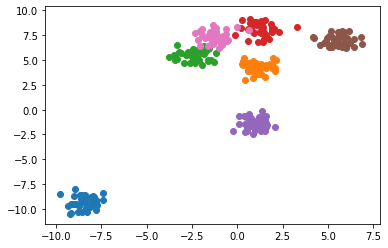

In [79]:
for cluster in set(df['cluster_id']):
    plt.scatter(df[df['cluster_id']==cluster]['X1'], df[df['cluster_id']==cluster]['X2'])


In [80]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3',
              color='cluster_id')
fig.show()

In [81]:
df.head()

,id,X1,X2,X3,F,subcluster_id,cluster_id
0,1,0.513361,-2.134845,2.210909,39.536146,2,4
1,2,1.405493,6.820601,-6.892799,28.807026,0,3
2,3,0.886324,-2.496526,1.848823,35.081346,2,4
3,4,6.014676,6.221326,6.617437,35.906229,1,5
4,5,-1.577645,7.454646,6.999762,47.647822,4,6


# Merge I

In [ ]:
Merger = IMerger(const.config)
Merger.mergeClusters(df)

In [ ]:
plt.scatter(df['X1'],df['X2'], c=df['cluster_id'])

In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='F',
              color='cluster_id')
fig.show()

# Subcluster

In [71]:
const.config['isolated_cluster']['divider']=1

In [82]:
sub = Subclusters(const.config)

In [83]:
df = sub.subclustering(df, type_of_closed=2)

Calculate for  7 clusters



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 311.78it/s]

43



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 531.17it/s]

43



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 472.80it/s]

43



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 467.66it/s]

43



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 159.35it/s]

43



100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 194.56it/s]

42



100%|█████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 321.08it/s]

43


In [84]:
df.head()

,id,X1,X2,X3,F,subcluster_id,cluster_id
0,1,0.513361,-2.134845,2.210909,39.536146,10,4
1,2,1.405493,6.820601,-6.892799,28.807026,7,3
2,3,0.886324,-2.496526,1.848823,35.081346,10,4
3,4,6.014676,6.221326,6.617437,35.906229,11,5
4,5,-1.577645,7.454646,6.999762,47.647822,14,6


In [85]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3', color = 'subcluster_id')
fig.show()